# Data Gathered From Quarterly Census of Employment and Wages

https://data.bls.gov/cew/apps/data_views/data_views.htm#tab=Tables

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = "QCEW"

In [10]:
initialized = False
for borough in ["Manhattan", "Queens", "Brooklyn", "Bronx", "Staten Island"]:
    df = pd.read_csv(path + "/" +  borough + "_QCEW.csv")
    df["Borough"] = borough
    if not initialized:
        summary = df
        initialized = True
    else:
        summary = pd.concat([summary, df])

In [11]:
summary

,Year,Quarter,Quarterly Establishments,Third Month Employment,Average Weekly Wage,Third Month Employment Location Quotient,Average Weekly Wage Location Quotient,Third Month Employment Change Over the Year,Third Month Employment % Change Over the Year,Average Weekly Wage Change Over the Year,Average Weekly Wage % Change Over the Year,Borough
0,2019,1,126261,2277539,3312,1.07,1.04,62354,0.028,59,0.018,Manhattan
1,2019,2,127518,2307608,2152,1.06,1.03,59655,0.027,89,0.043,Manhattan
2,2019,3,128008,2290778,2100,1.06,1.03,63164,0.028,58,0.028,Manhattan
3,2019,4,128628,2344341,2583,1.07,1.03,56223,0.025,111,0.045,Manhattan
4,2020,1,129964,2260365,3448,1.07,1.04,-17174,-0.008,136,0.041,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...
10,2021,3,9760,103019,1044,0.96,0.90,7126,0.074,15,0.015,Staten Island
11,2021,4,10143,109984,1144,0.97,0.91,7433,0.072,18,0.016,Staten Island
12,2022,1,10207,108270,1015,0.97,0.88,7968,0.079,33,0.034,Staten Island
13,2022,2,9936,109615,1111,0.97,0.91,5763,0.055,58,0.055,Staten Island


In [12]:
# period index with year and quarter columns
periods = pd.PeriodIndex(year=summary['Year'], quarter=summary['Quarter'])

# convert period index to datetime index
summary["Date"] = periods.to_timestamp()

summary['Date'] = pd.to_datetime(summary['Date'])

# drop the year and quarter columns 
summary = summary.drop(columns=['Year', 'Quarter'])



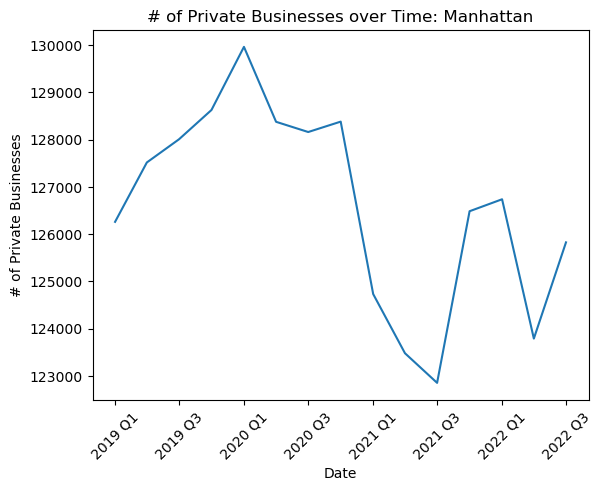

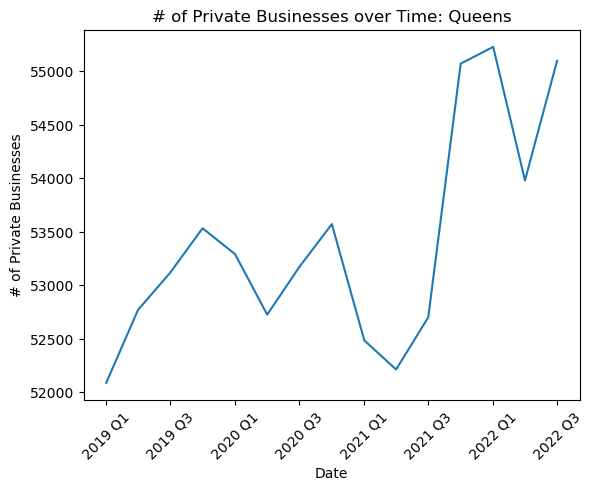

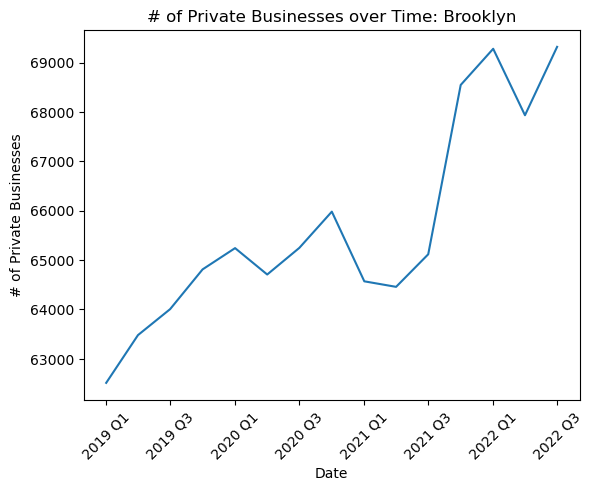

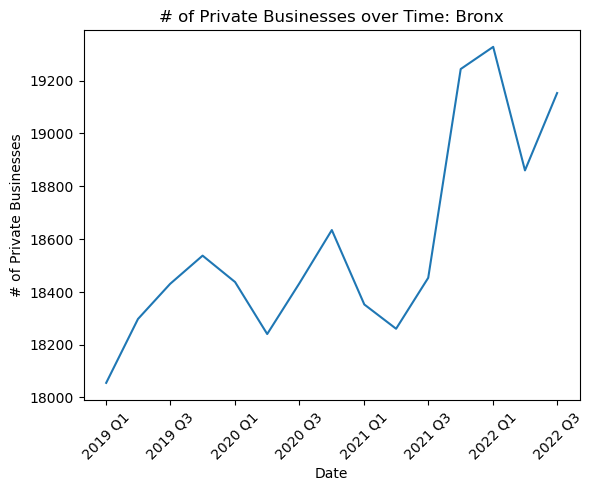

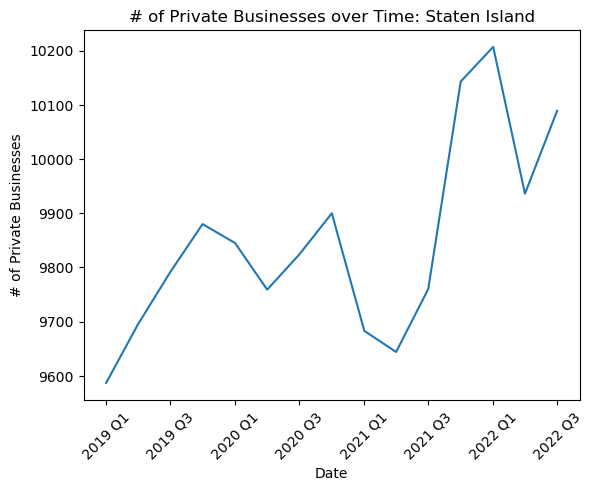

In [13]:
def plot_establishments(df, borough):
    ax = sns.lineplot(x='Date', y= "Quarterly Establishments", data=summary[summary["Borough"] ==  borough])
    plt.title("# of Private Businesses over Time: %s" % borough)
    ax.set_xticks(["2019-01", "2019-07", "2020-01","2020-07", "2021-01", "2021-07", "2022-01", "2022-07"])
    ax.set_xticklabels(["2019 Q1", "2019 Q3", "2020 Q1", "2020 Q3", "2021 Q1", "2021 Q3", "2022 Q1", "2022 Q3"], rotation=45)
    plt.ylabel("# of Private Businesses")
    plt.show()

for borough in ["Manhattan", "Queens", "Brooklyn", "Bronx", "Staten Island"]:
    plot_establishments(summary, borough)

    

In [22]:
total_grouped = summary.groupby("Date")["Quarterly Establishments"].agg(total = np.sum)
total_grouped.reset_index(inplace=True)

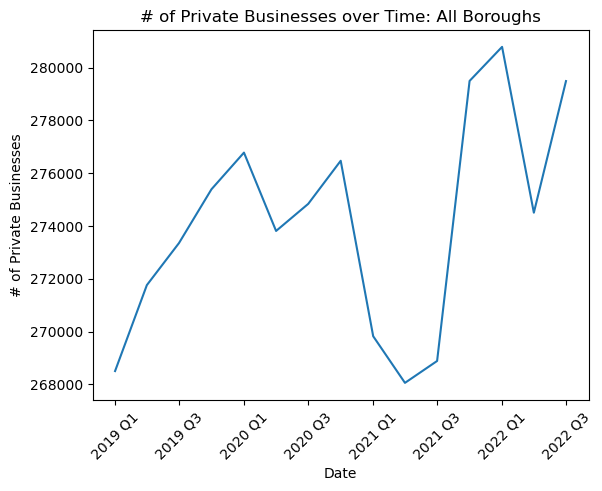

In [27]:
ax = sns.lineplot(x='Date', y= "total", data=total_grouped)
plt.title("# of Private Businesses over Time: All Boroughs")
ax.set_xticks(["2019-01", "2019-07", "2020-01","2020-07", "2021-01", "2021-07", "2022-01", "2022-07"])
ax.set_xticklabels(["2019 Q1", "2019 Q3", "2020 Q1", "2020 Q3", "2021 Q1", "2021 Q3", "2022 Q1", "2022 Q3"], rotation=45)
plt.ylabel("# of Private Businesses")
plt.show()


In [45]:
pct_change = pd.DataFrame(columns = ["Date", "Quarterly Establishments",  "Borough"])

pd.options.mode.chained_assignment = None

for borough in ["Manhattan", "Queens", "Brooklyn", "Bronx", "Staten Island"]:
    
    extract = summary[summary["Borough"] ==  borough][["Date", "Quarterly Establishments", "Borough"]]
    
    cutoff = pd.to_datetime('2019-10-01')
    extract_filtered = extract[extract['Date'] >= cutoff]
    
    beginning = float(extract_filtered[extract_filtered["Date"] == "2019-10-01"]["Quarterly Establishments"])

    extract_filtered["PCT_Change"] =  ((extract_filtered['Quarterly Establishments'] - beginning) / beginning) * 100
    
    pct_change = pd.concat([pct_change,extract_filtered] , axis = 0)
    


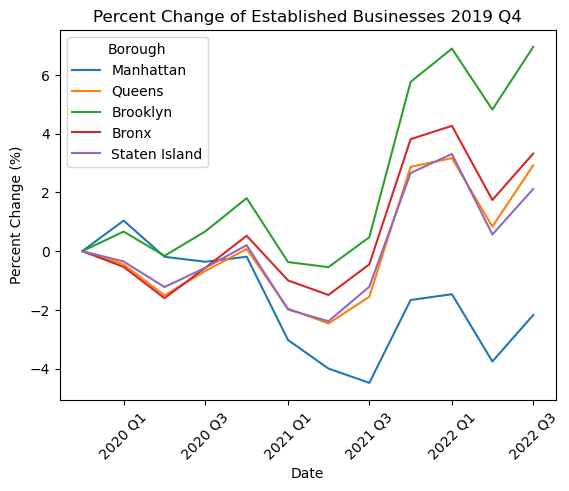

In [55]:
ax = sns.lineplot(x='Date', y= "PCT_Change", hue = "Borough", data=pct_change)
plt.title("Percent Change of Established Businesses 2019 Q4")
ax.set_xticks(["2020-01","2020-07", "2021-01", "2021-07", "2022-01", "2022-07"])
ax.set_xticklabels(["2020 Q1", "2020 Q3", "2021 Q1", "2021 Q3", "2022 Q1", "2022 Q3"], rotation=45)
plt.ylabel("Percent Change (%)")
plt.show()